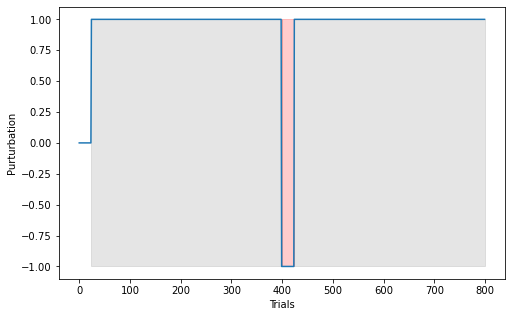

In [2]:
#single state model
import numpy as np
import matplotlib.pyplot as plt

#you almost got everything correct. good start.

#first you create an array for the trials (X = trials). 
x = np.arange(0,800,1)

#then you create an empty array to store the y values (here y = Adaptation)
#I changed this to uppercase Y because i am using lowercase elsewhere
Y = np.zeros(len(x))

#you have the A and B values here
A=0.99
B=0.013

#You are missing the purturbation schedule. In the first few trials you don't have any purturbations(the robot is not applying)
#any force. After that the robot applies the forces. So we can create a purturbation schedule that is an array with zeros
#equal to the number of trials. Then we change the array indices to one when we have a purturbation. 

purt = np.zeros(800) #create the array
purt[24:399] = 1 #we have purturbation trials from 25: 400 (since python starts index from 0 its 24: 399)
purt[399:424] = -1 #then we have a purturbation in the other direction thus -1
purt[424:800] = 1 #then we have a purturbation in the correct direction

#plot the purturbation schedule. i have left some stuff out. fill them out and plot the purturbation schedule. it should look
#like figure 1A

#plt.xkcd()
plt.figure(figsize = (8,5))

plt.plot(x,purt) #what should we plot here? 

plt.fill_between([24,399], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([424, 800], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([400, 424], [1], [-1], color = 'r', alpha = 0.2)
plt.xlabel('Trials')
plt.ylabel('Purturbation')
plt.show()

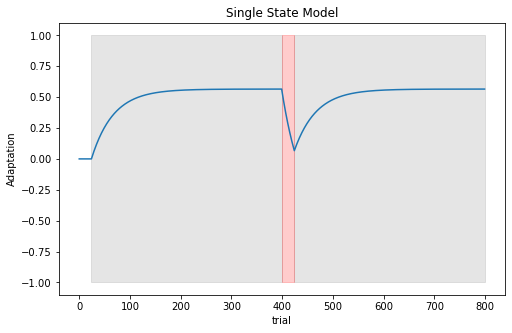

In [6]:
#almost correct

#first you have to create initial values for the error and the adaptation

#initial values
xx = 0 #what is the adaptation at the begining? is there an adapation? 
e = 0 #what is the error at the begining

for i in range(len(x)): #good
    
    #here the output (y value) is the adaptation. How do we calculate the adaptation. What is the equation for the
    #single state model 
    y = A * xx + B * e #at the very first trial there is no purturbation. so there is no error. So at the very first trial we 
    #get y = 0 (because x and e are 0)
    
    #next we update the error. what is the error. error is the purturbation at trial i - the adaptation at trial i
    e = purt[i]-y #how do we calculate the error? 
  
    #next we update the new value for xx? What is the new value for xx? note that xx is the adaptation. 
    xx = y #what is going here
   
    
    #append all the values to the Y matrix created above
    Y[i] = y
    
    #y[i]= A*x[i-1] + B*x[i]

    
    
#plot the single state model
plt.figure(figsize = (8, 5))
plt.plot(x, Y)
plt.fill_between([24,399], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([424, 800], [1], [-1], color = 'grey', alpha = 0.2)
plt.fill_between([400, 424], [1], [-1], color = 'r', alpha = 0.2)
plt.xlabel("trial")
plt.ylabel("Adaptation")
plt.title("Single State Model" )
plt.show()

In [13]:
#Two state, gain-specific